### Data Processing, Feature Engineering & Model Building

In this notebook, we shall predict images from local files or url using the model

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import requests
from io import BytesIO
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import *
import matplotlib.pyplot as plt
%matplotlib inline

Load Saved Model

In [17]:
# Reload model, including its weights and the optimizer
loaded_model = tf.keras.models.load_model('my_model.h5')


##### Load Image from Local File and predict

In [11]:
def predict_img_file(path):
    try:
        img_path = pathlib.Path(path)
        img = image.load_img(img_path, target_size=(160, 160))
        plt.imshow(img)
        plt.axis("off")
        plt.show()
        img_array = image.img_to_array(img)
        img_batch = np.expand_dims(img_array, axis=0)
        predictions = loaded_model.predict_on_batch(img_batch).flatten()
        predictions = tf.nn.sigmoid(predictions)
        predictions = tf.where(predictions < 0.5, 0, 1)
        labels = ['Defective Box', 'Non Defective Box']
        return {'prediction': 'This is a {}'.format(labels[predictions.numpy()[0]])}
    except Exception as ex:
        logging.info("Error:", ex)
        exit('Error Occured: Check File Path')

In [12]:
path = "/Users/james/Documents/isw_projects/Image Classifier/Recruitment Data/Non Defective Boxes/blank-sliding-drawer-hard-cardboard-260nw-1450484612.jpg"


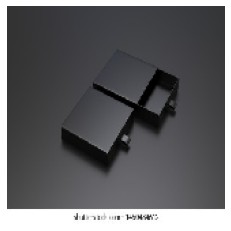

{'prediction': 'This is a Non Defective Box'}

In [13]:
predict_img_file(path)

##### Load Image from URL and predict

In [51]:
import logging


In [14]:
def predict_img_url(url):
    try:
        response = requests.get(url)
        img = PIL.Image.open(BytesIO(response.content))
        img = img.resize((160, 160), PIL.Image.ANTIALIAS)
        plt.imshow(img)
        plt.axis("off")
        plt.show()
        img_array = image.img_to_array(img)
        img_batch = np.expand_dims(img_array, axis=0)
        predictions = loaded_model.predict_on_batch(img_batch).flatten()
        predictions = tf.nn.sigmoid(predictions)
        predictions = tf.where(predictions < 0.5, 0, 1)
        labels = ['Defective Box', 'Non Defective Box']
        return {'prediction': 'This is a {}'.format(labels[predictions.numpy()[0]])}
    except Exception as ex:
        logging.info("Error:", ex)
        exit('Error Occured: Invalid URL or Connection Error')

In [15]:
url = 'https://ei.marketwatch.com/Multimedia/2019/10/10/Photos/ZG/MW-HT101_nerd_d_20191010165334_ZG.jpg?uuid=062c714e-eba0-11e9-bbd4-9c8e992d421e'


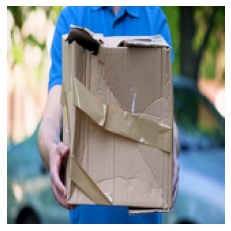

{'prediction': 'This is a Defective Box'}

In [16]:
predict_img_url(url)